In [1]:
# Not using any tf libraries so far...
import numpy as np 
# To make sure that you get the implementation right let us first have a look at the data structure.
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])

# These are possible labels form some logical gates.
t_and = np.array([0,0,0,1])

t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])
import numpy as np

def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoidprime(x):
  return x*(1-x)

In [9]:
class Perceptron:
  
  def __init__(self, input_units):
    self.input_units = input_units
    self.weights = np.random.randn(input_units)
    self.bias = np.random.randn()
    self.alpha = 0.1
      
  def forward_step(self, input):
    self.input = input
    drive =  np.dot(input, self.weights) + self.bias
    return sigmoid(drive)
      
  def update(self, delta):
    # self.prediction = self.forward_step(self.input)

    delta_weights = delta*self.input
    delta_bias = delta

    self.weights -= delta_weights
    self.bias -= delta_bias

class MLP:

  def __init__(self):

    h1 = Perceptron(2)
    h2 = Perceptron(2)
    h3 = Perceptron(2)
    h4 = Perceptron(2)
    self.hidden_layer = [h1, h2, h3, h4]
    self.output_layer = Perceptron(4)

      
  def forward_step(self, inputs):
    hidden_out = []

    for h in self.hidden_layer:
      hidden_out.append(h.forward_step(inputs))
    self.hidden_out = np.array(hidden_out) # (4,)-sized array

    self.out = self.output_layer.forward_step(self.hidden_out)

      
  def backprop_step(self, target):

    delta_out = (self.out-target)*sigmoidprime(self.out)

    self.output_layer.update(delta_out)
    delta_hidden = [(delta_out*self.output_layer.weights[i])*sigmoidprime(h) for i, h in enumerate(self.hidden_out)]
    delta_hidden = np.array(delta_hidden)

    for i in range(len(self.hidden_layer)):
      self.hidden_layer[i].update(delta_hidden[i])


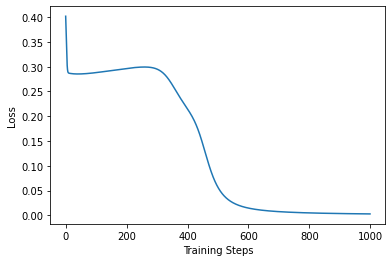

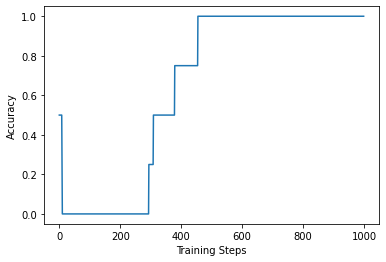

In [8]:
mlp = MLP()
epochs = []
losses = []
accuracies = []

for i in range(1000):
  epochs.append(i)
  loss_avg = 0
  accuracy_avg = 0

  for j in range(len(x)):
    input = x[j]
    t = t_xor[j]

    mlp.forward_step(input)
    mlp.backprop_step(t)

    loss_avg += (mlp.out-t)**2
    accuracy_avg += int(int(mlp.out>0.5) == t)
  
  loss_avg = loss_avg/len(x)
  accuracy_avg = accuracy_avg/len(x)
  losses.append(loss_avg)
  accuracies.append(accuracy_avg)


import matplotlib.pyplot as plt


plt.plot(epochs,losses)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

plt.plot(epochs,accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()